In [22]:
%matplotlib inline
from __future__ import print_function, division
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, InputLayer, Reshape
from keras import backend as K
from keras.utils.np_utils import to_categorical
from pprint import pprint
from scipy.ndimage.filters import convolve
from skimage.color import rgb2gray
import vis.visualization as kvis
import vis.utils.utils as kvisutils
import numpy as np
import os
import matplotlib.pyplot as plt

os.environ['CUDA_VISIBLE_DEVICES'] = "0"
print('Done')

Done


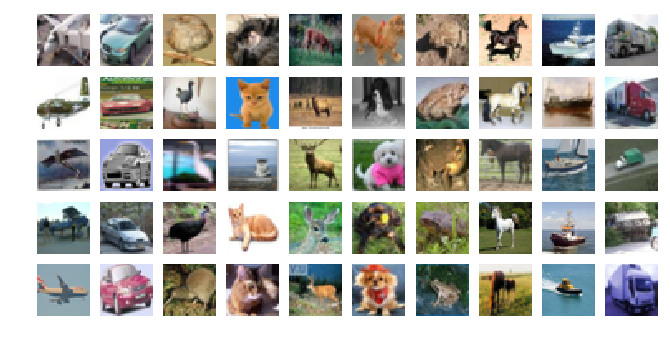

(50000, 32, 32, 3) (50000, 10) 0.473363000485
(10000, 32, 32, 3) (10000, 10) 0.476584920598


In [52]:
# Data
(xtrn, ytrn), (xtst, ytst) = cifar10.load_data()

xtrn = xtrn / 255.
xtst = xtst / 255.
ytrn = to_categorical(ytrn)
ytst = to_categorical(ytst)

# # Convert to grayscale to prevent network from just picking up on colors.
# xtrn = rgb2gray(xtrn)
# xtst = rgb2gray(xtst)

fig, _ = plt.subplots(5, 10, figsize=(8,4))
for idx, ax in enumerate(fig.axes):
    label = idx % 10
    didx = np.random.choice(np.where(np.argmax(ytrn, axis=1) == label)[0])
    ax.imshow(xtrn[didx], cmap='gray')
    ax.axis('off')
plt.show()

print(xtrn.shape, ytrn.shape, np.mean(xtrn))
print(xtst.shape, ytst.shape, np.mean(xtst))

In [53]:
# Network definition.
model = Sequential()
model.add(InputLayer(input_shape=xtrn.shape[1:]))
# model.add(Reshape(xtrn.shape[1:] + (1,)))
model.add(Conv2D(32, 3, activation='relu', name='conv_32_0'))
model.add(Conv2D(32, 3, activation='relu', name='conv_32_1'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(64, 3, activation='relu', name='conv_64_0'))
model.add(Conv2D(64, 3, activation='relu', name='conv_64_1'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu', name='dense_1024_0'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', name='dense_1024_1'))
model.add(Dropout(0.5))
model.add(Dense(ytrn.shape[1], activation='softmax', name='dense_10'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xtrn, ytrn, batch_size=128, epochs=20, verbose=2, validation_data=(xtst, ytst))
model.save_weights('cifar10_cnn_weights.hdf5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv_32_0 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv_32_1 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv_64_0 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv_64_1 (Conv2D)           (None, 10, 10, 64)        36928     
__________

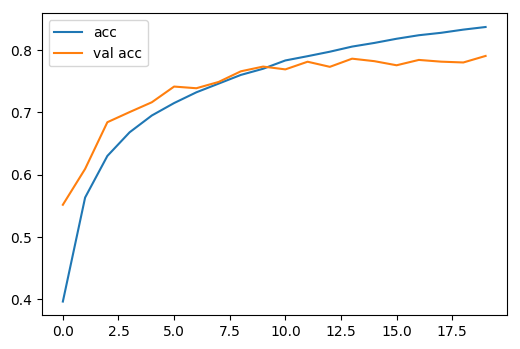

In [54]:
# Plot history
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()

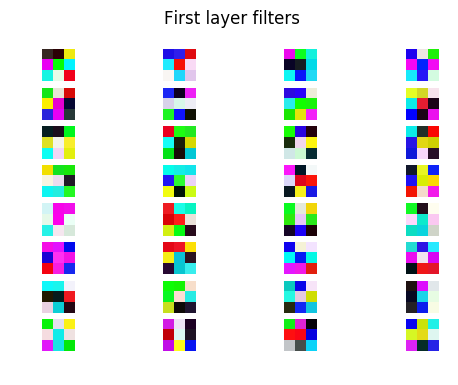

In [57]:
# Visualize filters at the first Conv2D layer.
# This doesn't do much in terms of understandability.
model.load_weights('cifar10_cnn_weights.hdf5')
layer = model.get_layer('conv_32_0')
weights = layer.get_weights()[0]
filters = weights.squeeze().transpose([3,0,1,2])
                              
fig, _ = plt.subplots(8, 4)
for filt, ax in zip(filters, fig.axes):
    ax.imshow(filt, cmap='gray')
    ax.axis('off')

plt.suptitle('First layer filters')
plt.show()

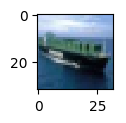

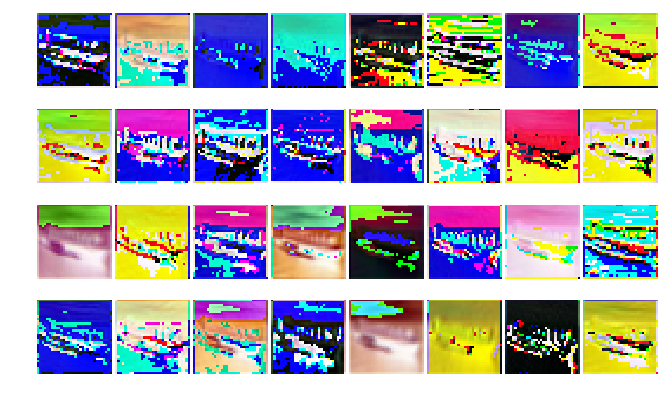

In [62]:
# Visualize each of the filters convolved with a random training sample.
# This (maybe) helps a little more.
img = xtst[np.random.randint(0, len(xtst))]
plt.figure(figsize=(1,1))
plt.imshow(img)
plt.show()
fig, _ = plt.subplots(4, 8,figsize=(8,5))
for filt, ax in zip(filters, fig.axes):
    conv = convolve(img, filt, mode='constant', cval=0.)
    ax.imshow(conv)
    ax.axis('off')
plt.subplots_adjust(left=None, wspace=0.05, hspace=0.05, right=None)
plt.show()

Working on filters: [0]
Working on filters: [1]
Working on filters: [2]
Working on filters: [3]
Working on filters: [4]
Working on filters: [5]
Working on filters: [6]
Working on filters: [7]
Working on filters: [8]
Working on filters: [9]
Working on filters: [10]
Working on filters: [11]
Working on filters: [12]
Working on filters: [13]
Working on filters: [14]
Working on filters: [15]
Working on filters: [16]
Working on filters: [17]
Working on filters: [18]
Working on filters: [19]
Working on filters: [20]
Working on filters: [21]
Working on filters: [22]
Working on filters: [23]
Working on filters: [24]
Working on filters: [25]
Working on filters: [26]
Working on filters: [27]
Working on filters: [28]
Working on filters: [29]
Working on filters: [30]
Working on filters: [31]


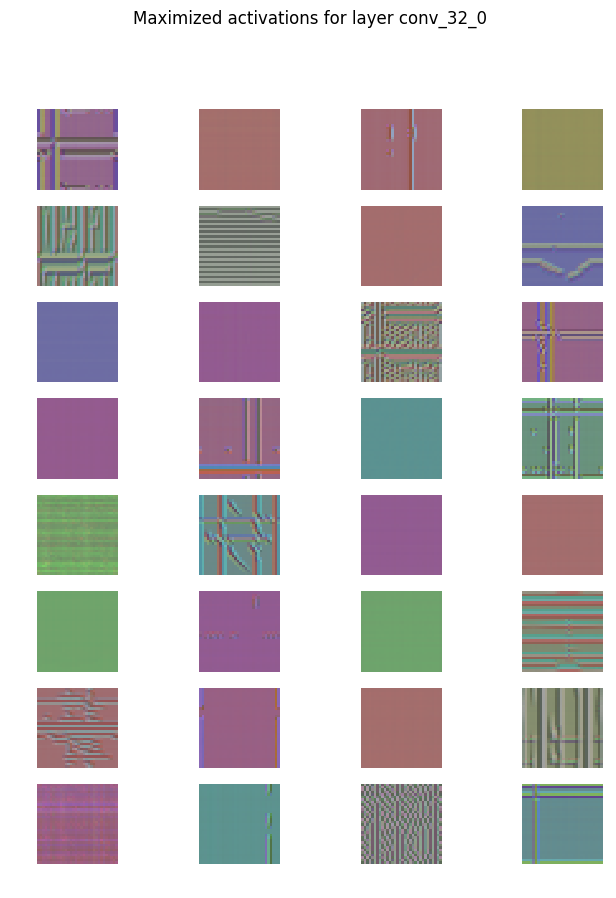

Working on filters: [0]
Working on filters: [1]
Working on filters: [2]
Working on filters: [3]
Working on filters: [4]
Working on filters: [5]
Working on filters: [6]
Working on filters: [7]
Working on filters: [8]
Working on filters: [9]
Working on filters: [10]
Working on filters: [11]
Working on filters: [12]
Working on filters: [13]
Working on filters: [14]
Working on filters: [15]
Working on filters: [16]
Working on filters: [17]
Working on filters: [18]
Working on filters: [19]
Working on filters: [20]
Working on filters: [21]
Working on filters: [22]
Working on filters: [23]
Working on filters: [24]
Working on filters: [25]
Working on filters: [26]
Working on filters: [27]
Working on filters: [28]
Working on filters: [29]
Working on filters: [30]
Working on filters: [31]


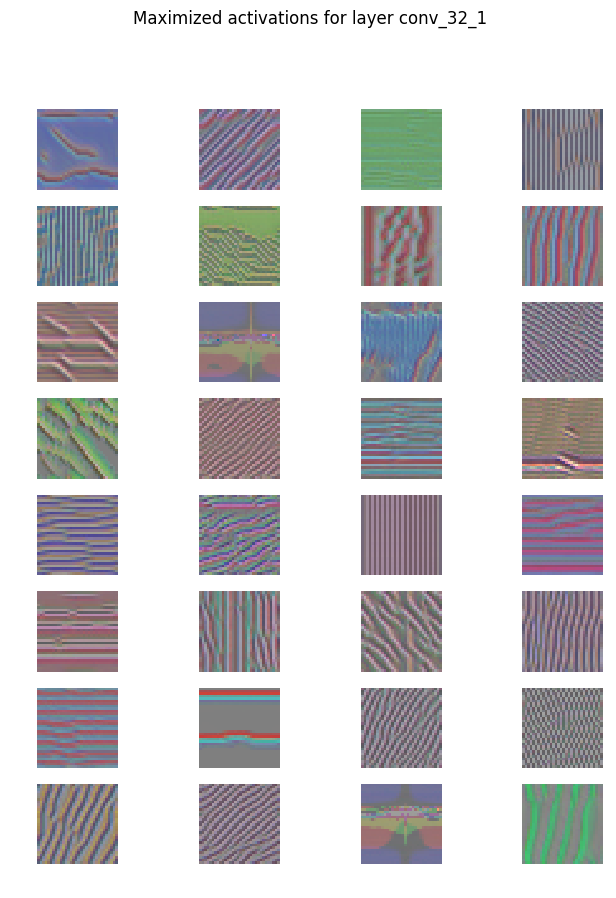

In [65]:
# Use keras-vis to find an image that maximizes the first layer's filters.
# This at least creates some distinguishable patterns, although it's not immediately obvious
# what the patterns represent.
seed_img = np.mean(xtrn, axis=0)
layer = model.get_layer('conv_32_0')
layer_idx = model.layers.index(layer)
nb_filters = layer.output_shape[-1]

fig, _ = plt.subplots(8, 4, figsize=(8, 10))
for idx, ax in enumerate(fig.axes):
    maxactiv = kvis.visualize_activation(model, layer_idx, filter_indices=idx, tv_weight=0., 
                                         seed_img=seed_img)
    ax.imshow(maxactiv, cmap='gray')
    ax.axis('off')

plt.suptitle('Maximized activations for layer %s' % layer.name)
plt.show()

# Repeat for the second conv layer.
layer = model.get_layer('conv_32_1')
layer_idx = model.layers.index(layer)
nb_filters = layer.output_shape[-1]

fig, _ = plt.subplots(8, 4, figsize=(8, 10))
for idx, ax in enumerate(fig.axes):
    maxactiv = kvis.visualize_activation(model, layer_idx, filter_indices=idx, tv_weight=0., 
                                         seed_img=seed_img)
    ax.imshow(maxactiv)
    ax.axis('off')

plt.suptitle('Maximized activations for layer %s' % layer.name)
plt.show()